# Gene regulatory network approach analysis

In [6]:
from gene_report.grn_pipeline import GRNPipeline

gg = GRNPipeline(wdir="/Users/samibening/Projects/Bachelor/", 
                 adata="data/output/adata.h5ad",
                 f_adj='SCENICfiles/adj.csv',
                 f_reg='SCENICfiles/reg.csv')
gg

TypeError: gmt_to_decoupler() takes 1 positional argument but 2 were given

In [2]:
# set GOI
GOI = 'CASP8'

In [3]:
pathways_goi = gg.get_goi_pathways(GOI)
pathways_goi

# Spearman correlation between geneset and GOI expression across all cell types

geneset genesymbol  correlation
0                                         MSC_REGULON      CASP8     0.236131
1         REACTOME_REGULATION_OF_NF_KAPPA_B_SIGNALING      CASP8     0.156916
2                                       TFDP1_REGULON      CASP8     0.142626
3                   REACTOME_NOD1_2_SIGNALING_PATHWAY      CASP8     0.129718
4                                       IKZF3_REGULON      CASP8     0.129300
5            REACTOME_INTRINSIC_PATHWAY_FOR_APOPTOSIS      CASP8     0.125933
6   REACTOME_NUCLEOTIDE_BINDING_DOMAIN_LEUCINE_RIC...      CASP8     0.117351
7                                       IKZF1_REGULON      CASP8     0.114201
8                              REACTOME_TNF_SIGNALING      CASP8     0.111905
9       REACTOME_TNFR1_INDUCED_PROAPOPTOTIC_SIGNALING      CASP8     0.111356
10  REACTOME_DDX58_IFIH1_MEDIATED_INDUCTION_OF_INT...      CASP8     0.104646
11  REACTOME_TAK1_DEPENDENT_IKK_AND_NF_KAPPA_B_ACT...      CASP8     0.089646
12  REACTOME_CASPASE_ACTIVATION_VIA_DEATH_RECEPTOR...      CASP8     0.086493
13                        REACTOME_REGULATED_NECROSIS      CASP8     0.086321
14         REACTOME_RIPK1_MEDIATED_REGULATED_NECROSIS      CASP8     0.084012
15              REACTOME_C_TYPE_LECTIN_RECEPTORS_CLRS      CASP8     0.078524
16                 REACTOME_CLEC7A_DECTIN_1_SIGNALING      CASP8     0.078317
17                     REACTOME_PROGRAMMED_CELL_DEATH      CASP8     0.072300
18  REACTOME_CASPASE_ACTIVATION_VIA_EXTRINSIC_APOP...      CASP8     0.068468
19                                 REACTOME_APOPTOSIS      CASP8     0.067486
20                                        TBP_REGULON      CASP8     0.067413
21            REACTOME_INTERLEUKIN_1_FAMILY_SIGNALING      CASP8     0.056597
22                   REACTOME_INTERLEUKIN_1_SIGNALING      CASP8     0.055465
23                  REACTOME_DEATH_RECEPTOR_SIGNALING      CASP8     0.050325
24                                       ATF4_REGULON      CASP8     0.041762
25         REACTOME_DISEASES_OF_PROGRAMMED_CELL_DEATH      CASP8     0.038461
26            REACTOME_MYD88_INDEPENDENT_TLR4_CASCADE      CASP8     0.036400
27                 REACTOME_APOPTOTIC_EXECUTION_PHASE      CASP8     0.031947
28   REACTOME_APOPTOTIC_CLEAVAGE_OF_CELLULAR_PROTEINS      CASP8    -0.009089
29                                       IRF1_REGULON      CASP8     0.006591
30         REACTOME_TOLL_LIKE_RECEPTOR_9_TLR9_CASCADE      CASP8     0.003475
31      REACTOME_TOLL_LIKE_RECEPTOR_TLR1_TLR2_CASCADE      CASP8     0.002684
32               REACTOME_TOLL_LIKE_RECEPTOR_CASCADES      CASP8     0.001308

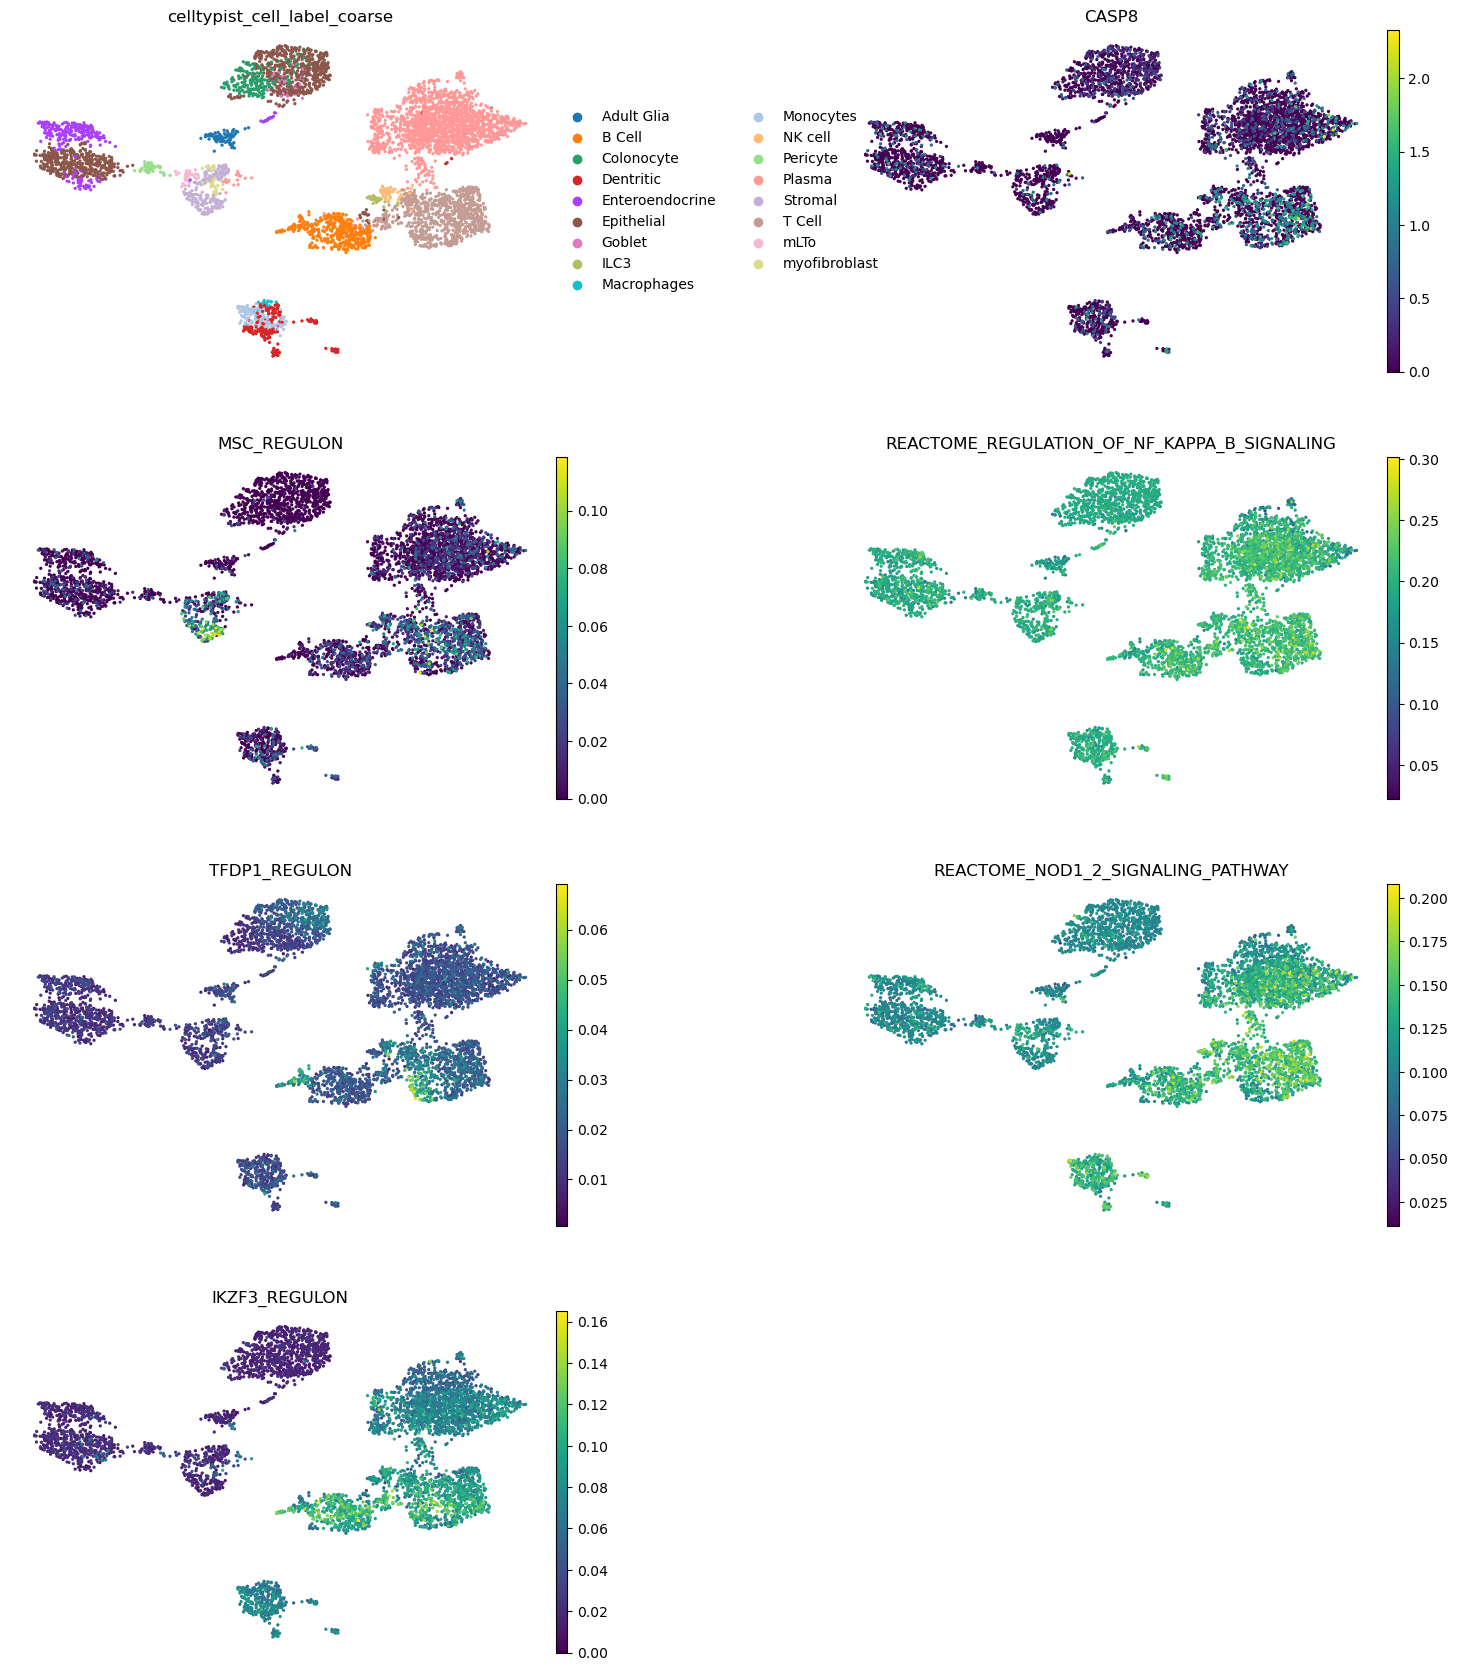

In [4]:
gg.plot_pathways(pathways_goi, GOI)
# cell types and GOI on top, then
# TODO: split different groups in columns (e.g. regulon, reactome, gene)

# Regulon-level gene set enrichment analysis

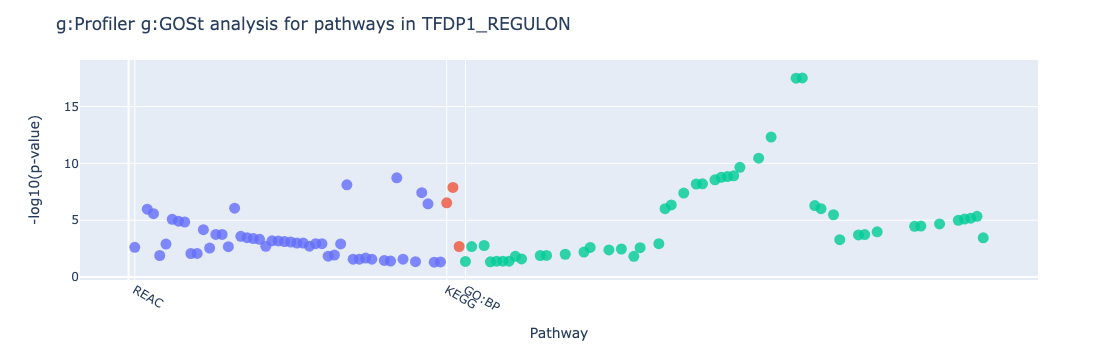

In [5]:
# show pathways enriched in specific GOI regulon

gprofiler = gg.gGOSt(regulon='TFDP1_REGULON') # set gene set of interest here

# What pathway databases do we want here? Reactome, KEGG, etc.? 
# easier access to pathway? link? 

## Network Visualization

In [6]:
goi_grn = gg.make_goi_grn(GOI=GOI)
len(goi_grn) # number of TF-target gene pairs in entire GOI GRN

529

In [7]:
# GOI text summary:

gg.GOI_network_stats(goi_grn, GOI)
gg.format_gene_summary(goi_grn, GOI)

Summary of CASP8:

There are 7 regulons that have CASP8 in their target genes.

Regulons that have CASP8 in their target genes:

	(TF: GENIE3 Importance Score)
	MSC: 0.535
	IKZF3: 0.374
	ATF4: 0.309
	IRF1: 0.242
	TBP: 0.231
	IKZF1: 0.222
	TFDP1: 0.213


There are 114 TFs for CASP8 that were NOT supported by a regulon (motif analysis),
here are the top 10:

	(TF: GENIE3 Importance Score)
	RAN: 1.402
	CANX: 1.209
	HNRNPC: 1.187
	YBX1: 1.095
	RPS10: 0.948
	RPL35: 0.914
	RPS4X: 0.822
	SFPQ: 0.8
	HMGB1: 0.671
	BATF: 0.65
	HMGB2: 0.594

CASP8: 

	This gene encodes a member of the cysteine-aspartic acid protease (caspase) family.
	Sequential activation of caspases plays a central role in the execution-phase of
	cell apoptosis. Caspases exist as inactive proenzymes composed of a prodomain, a
	large protease subunit, and a small protease subunit. Activation of caspases requires
	proteolytic processing at conserved internal aspartic residues to generate a heterodimeric enzyme
	consisting of the 

In [8]:
# network visualization

# customize network viz:
# direct_TF = True (standard): only show GOI and it's direct regulating TFs (regulons)
# top_n = X: only show top X direct target genes of each TF
# other customize options? Hover data? 
# more overview, less customization

gg.make_network(goi_grn, GOI, direct_TF=True, top_n = 3) 

gg.show_network() # only works on browser for now